In [1]:
import numpy as np
import pickle as pk
import matplotlib
import matplotlib.pyplot as pl
from astropy import units
from astropy import constants
from scipy import interpolate
from astropy.io import fits
import dill
import sys, os
# %pylab inline

# Color = ['#0072b1','#009d73','#d45e00','k', 'grey','yellow']

Color = ['k', '#000075', '#a9a9a9','#9A6324', '#808000','#aaffc3', '#fffac8'  ,'#800000', '#ffd8b1',]

font = {'size'   : 18}
matplotlib.rc('font', **font)
# Latex stuff
pl.rc('text', usetex=True)
pl.rc('font', family='serif')




In [35]:

os.environ['COSMOSIS_SRC_DIR'] = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/'
sys.path.insert(0, '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/cosmosis_code/')
# DV = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/DV_obj_temp_all_code_comparison.pk','rb'))  
# DV = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/DV_obj_temp_all_code_comparison_wmead_wcsdndm_Pnl.pk','rb'))   
DV = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/DV_obj_temp_all_code_comparison_hf_Pnl.pk','rb'))   




In [36]:

csf = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/save_code_comparison_fourier_halofit_v0.4.fits')   
# csf = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/save_code_comparison_fourier_halofit_v0.4_wmead.fits')   
bin1_gt = csf['gammat'].data['BIN1']
bin2_gt = csf['gammat'].data['BIN2']
gt_csf = csf['gammat'].data['VALUE']
gt_ang = csf['gammat'].data['ANG']


bin1_wt = csf['wtheta'].data['BIN1']
bin2_wt = csf['wtheta'].data['BIN2']
wt_csf = csf['wtheta'].data['VALUE']
wt_ang = csf['wtheta'].data['ANG']


bin1_xip = csf['xip'].data['BIN1']
bin2_xip = csf['xip'].data['BIN2']
xip_csf = csf['xip'].data['VALUE']
xip_ang = csf['xip'].data['ANG']




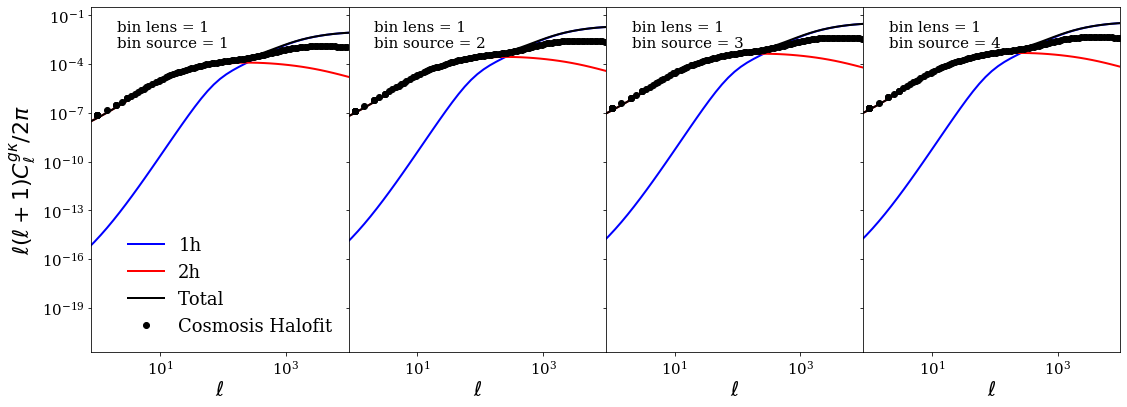

In [8]:
nbins = 4
fig, ax = pl.subplots(1,nbins, figsize = (nbins*4,6),sharey=True,sharex=True, gridspec_kw = {'wspace':0.0, 'hspace':0.0})
jc = 0
# bins = 4
binl = 1

l_array = DV.Cl_result_dict['l_array']
for j1 in range(nbins):        
    sel_ind = np.where((bin1_gt == binl) & (bin2_gt == j1+1))[0]
    bin_str = 'bin_' + str(binl) + '_' + str(j1+1)
    
    Cl_j1_1h = DV.Cl_result_dict['gk'][bin_str]['1h']
    Cl_j1_2h = DV.Cl_result_dict['gk'][bin_str]['2h']
    Cl_j1_tot = DV.Cl_result_dict['gk'][bin_str]['tot']    

    ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_1h/(2*np.pi), linestyle='-', marker='',lw = 2, color ='blue',label='1h')
    ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_2h/(2*np.pi), linestyle='-', marker='',lw = 2, color ='red',label='2h')
    ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_tot/(2*np.pi), linestyle='-', marker='',lw = 2, color ='black',label='Total')  
    
    ax[j1].errorbar(gt_ang[sel_ind], (gt_ang[sel_ind])*(gt_ang[sel_ind]+1)*gt_csf[sel_ind]/(2*np.pi), linestyle='', marker='o',lw = 2, color ='black',label='Cosmosis Halofit')  
    text = 'bin lens = ' + str(binl) + '\n' + 'bin source = ' + str(j1+1)
    ax[j1].text( 0.1, 0.96,text, verticalalignment='top', horizontalalignment='left', transform=ax[j1].transAxes, fontsize=15)    

    ax[j1].set_yscale('log')
    ax[j1].set_xscale('log')
    ax[j1].set_xlabel(r'$\ell$', size = 20)
    
    ax[j1].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j1].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize = 18, frameon = False)
ax[0].set_xlim(0.8,1e4)
ax[0].set_ylabel(r'$\ell (\ell+1) C^{g \kappa}_\ell / 2\pi $', size = 22)
pl.tight_layout()

# fig.savefig('xi_gg_compare_maglim_allbins.pdf')




No handles with labels found to put in legend.


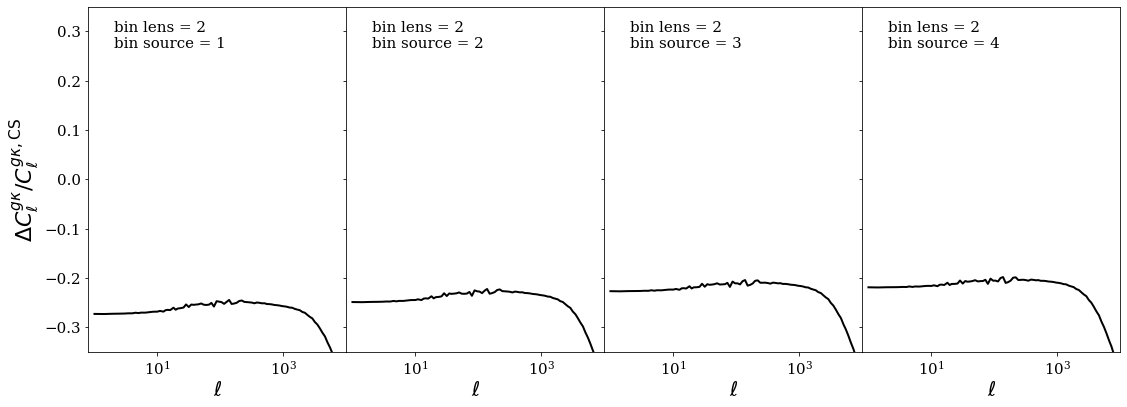

In [28]:

nbins = 4
fig, ax = pl.subplots(1,nbins, figsize = (nbins*4,6),sharey=True,sharex=True, gridspec_kw = {'wspace':0.0, 'hspace':0.0})
jc = 0
# bins = 4
binl = 2

l_array = DV.Cl_result_dict['l_array']
for j1 in range(nbins):        
    sel_ind = np.where((bin1_gt == binl) & (bin2_gt == j1+1))[0]
    bin_str = 'bin_' + str(binl) + '_' + str(j1+1)
    
    Cl_j1_tot = DV.Cl_result_dict['gk'][bin_str]['2h']    
    Cl_interp = interpolate.interp1d(np.log(l_array), np.log(Cl_j1_tot))
    Cl_csell = np.exp(Cl_interp(np.log(gt_ang[sel_ind])))
#     ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_tot/(2*np.pi), linestyle='-', marker='',lw = 2, color ='black',label='Total')  
    
    ax[j1].errorbar(gt_ang[sel_ind], (Cl_csell/(gt_csf[sel_ind])) -1, linestyle='-', marker='',lw = 2, color ='black')  
    text = 'bin lens = ' + str(binl) + '\n' + 'bin source = ' + str(j1+1)
    ax[j1].text( 0.1, 0.96,text, verticalalignment='top', horizontalalignment='left', transform=ax[j1].transAxes, fontsize=15)    

#     ax[j1].set_yscale('log')
    ax[j1].set_xscale('log')
    ax[j1].set_xlabel(r'$\ell$', size = 20)
    
    ax[j1].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j1].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize = 18, frameon = False)
ax[0].set_xlim(0.8,1e4)
ax[0].set_ylim(-0.35,0.35)
ax[0].set_ylabel(r'$\Delta C^{g \kappa}_\ell / C^{g \kappa, {\rm CS}}_\ell $', size = 22)
pl.tight_layout()
# fig.savefig('xi_gg_compare_maglim_allbins.pdf')






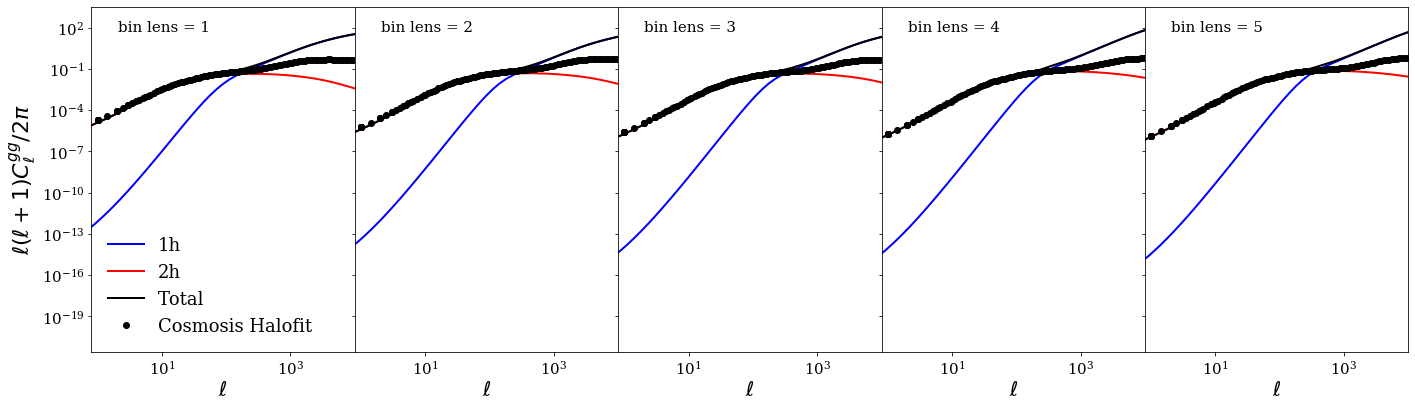

In [11]:
nbins = 5
fig, ax = pl.subplots(1,nbins, figsize = (nbins*4,6),sharey=True,sharex=True, gridspec_kw = {'wspace':0.0, 'hspace':0.0})
jc = 0
# bins = 4
# binl = 3

l_array = DV.Cl_result_dict['l_array']
for j1 in range(nbins):        
    sel_ind = np.where((bin1_wt == j1+1) & (bin2_wt == j1+1))[0]
    bin_str = 'bin_' + str(j1+1) + '_' + str(j1+1)
    
    Cl_j1_1h = DV.Cl_result_dict['gg'][bin_str]['1h']
    Cl_j1_2h = DV.Cl_result_dict['gg'][bin_str]['2h']
    Cl_j1_tot = DV.Cl_result_dict['gg'][bin_str]['tot']    

    ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_1h/(2*np.pi), linestyle='-', marker='',lw = 2, color ='blue',label='1h')
    ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_2h/(2*np.pi), linestyle='-', marker='',lw = 2, color ='red',label='2h')
    ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_tot/(2*np.pi), linestyle='-', marker='',lw = 2, color ='black',label='Total')  
    
    ax[j1].errorbar(wt_ang[sel_ind], (wt_ang[sel_ind])*(wt_ang[sel_ind]+1)*wt_csf[sel_ind]/(2*np.pi), linestyle='', marker='o',lw = 2, color ='black',label='Cosmosis Halofit')  
    text = 'bin lens = ' + str(j1+1) 
    ax[j1].text( 0.1, 0.96,text, verticalalignment='top', horizontalalignment='left', transform=ax[j1].transAxes, fontsize=15)    

    ax[j1].set_yscale('log')
    ax[j1].set_xscale('log')
    ax[j1].set_xlabel(r'$\ell$', size = 20)
    
    ax[j1].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j1].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize = 18, frameon = False)
ax[0].set_xlim(0.8,1e4)
ax[0].set_ylabel(r'$\ell (\ell+1) C^{gg}_\ell / 2\pi $', size = 22)
pl.tight_layout()

# fig.savefig('xi_gg_compare_maglim_allbins.pdf')





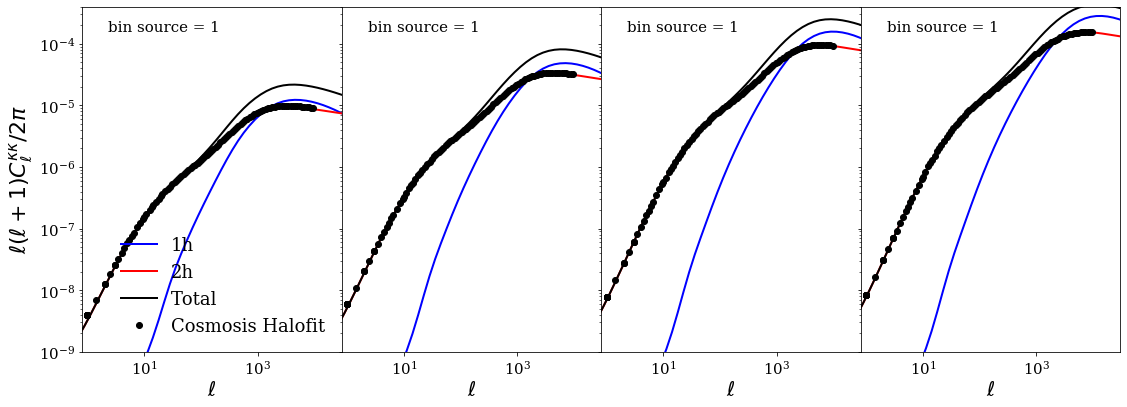

In [25]:
nbins = 4
fig, ax = pl.subplots(1,nbins, figsize = (nbins*4,6),sharey=True,sharex=True, gridspec_kw = {'wspace':0.0, 'hspace':0.0})
jc = 0
# bins = 4
# binl = 3

l_array = DV.Cl_result_dict['l_array']
for j1 in range(nbins):        
    sel_ind = np.where((bin1_xip == j1+1) & (bin2_xip == j1+1))[0]
    bin_str = 'bin_' + str(j1+1) + '_' + str(j1+1)
    
    Cl_j1_1h = DV.Cl_result_dict['kk'][bin_str]['1h']
    Cl_j1_2h = DV.Cl_result_dict['kk'][bin_str]['2h']
    Cl_j1_tot = DV.Cl_result_dict['kk'][bin_str]['tot']    

    ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_1h/(2*np.pi), linestyle='-', marker='',lw = 2, color ='blue',label='1h')
    ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_2h/(2*np.pi), linestyle='-', marker='',lw = 2, color ='red',label='2h')
    ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_tot/(2*np.pi), linestyle='-', marker='',lw = 2, color ='black',label='Total')  
    
    ax[j1].errorbar(xip_ang[sel_ind], (xip_ang[sel_ind])*(xip_ang[sel_ind]+1)*xip_csf[sel_ind]/(2*np.pi), linestyle='', marker='o',lw = 2, color ='black',label='Cosmosis Halofit')  
    text = 'bin source = ' + str(binl) 
    ax[j1].text( 0.1, 0.96,text, verticalalignment='top', horizontalalignment='left', transform=ax[j1].transAxes, fontsize=15)    

    ax[j1].set_yscale('log')
    ax[j1].set_xscale('log')
    ax[j1].set_xlabel(r'$\ell$', size = 20)
    
    ax[j1].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j1].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize = 18, frameon = False)
ax[0].set_xlim(0.8,3e4)
ax[0].set_ylim(1e-9,4e-4)
ax[0].set_ylabel(r'$\ell (\ell+1) C^{\kappa \kappa}_\ell / 2\pi $', size = 22)
pl.tight_layout()

# fig.savefig('xi_gg_compare_maglim_allbins.pdf')






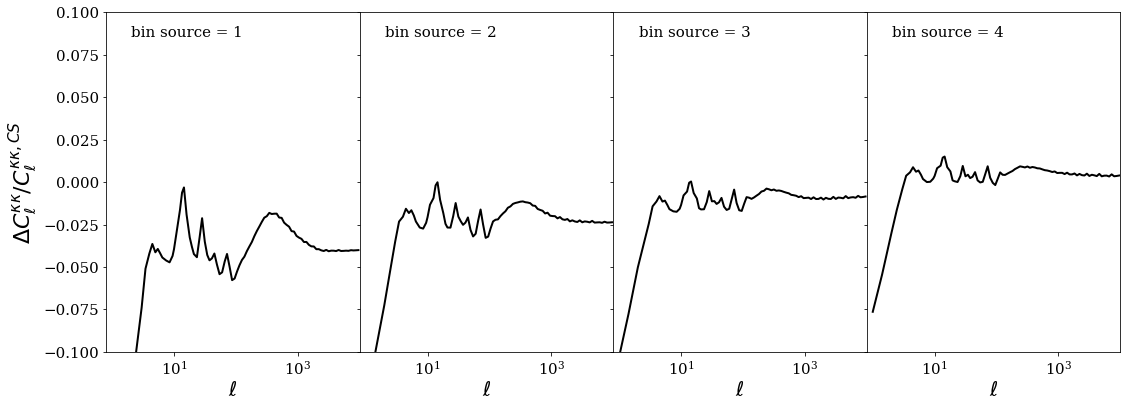

In [26]:
nbins = 4
fig, ax = pl.subplots(1,nbins, figsize = (nbins*4,6),sharey=True,sharex=True, gridspec_kw = {'wspace':0.0, 'hspace':0.0})
jc = 0
# bins = 4
# binl = 3

l_array = DV.Cl_result_dict['l_array']
for j1 in range(nbins):        
    sel_ind = np.where((bin1_xip == j1+1) & (bin2_xip == j1+1))[0]
    bin_str = 'bin_' + str(j1+1) + '_' + str(j1+1)
    
#     Cl_j1_1h = DV.Cl_result_dict['kk'][bin_str]['1h']
#     Cl_j1_2h = DV.Cl_result_dict['kk'][bin_str]['2h']
    Cl_j1_tot = DV.Cl_result_dict['kk'][bin_str]['2h']    
    Cl_interp = interpolate.interp1d(np.log(l_array), np.log(Cl_j1_tot))
    Cl_csell = np.exp(Cl_interp(np.log(xip_ang[sel_ind])))

#     ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_1h/(2*np.pi), linestyle='-', marker='',lw = 2, color ='blue',label='1h')
#     ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_2h/(2*np.pi), linestyle='-', marker='',lw = 2, color ='red',label='2h')
#     ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_tot/(2*np.pi), linestyle='-', marker='',lw = 2, color ='black',label='Total')  
    
    ax[j1].errorbar(xip_ang[sel_ind], (Cl_csell/xip_csf[sel_ind]) - 1, linestyle='-', marker='',lw = 2, color ='black',label='Cosmosis Halofit')  
    text = 'bin source = ' + str(j1+1) 
    ax[j1].text( 0.1, 0.96,text, verticalalignment='top', horizontalalignment='left', transform=ax[j1].transAxes, fontsize=15)    

#     ax[j1].set_yscale('log')
    ax[j1].set_xscale('log')
    ax[j1].set_xlabel(r'$\ell$', size = 20)
    
    ax[j1].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j1].tick_params(axis='both', which='major', labelsize=15)
# ax[0].legend(fontsize = 18, frameon = False)
ax[0].set_ylim(-0.1,0.1)
ax[0].set_xlim(0.8,1e4)
ax[0].set_ylabel(r'$\Delta C^{\kappa \kappa}_\ell / C^{\kappa \kappa, CS}_\ell $', size = 22)
pl.tight_layout()

# fig.savefig('xi_gg_compare_maglim_allbins.pdf')








NameError: name 'gt_ang_inpdv' is not defined

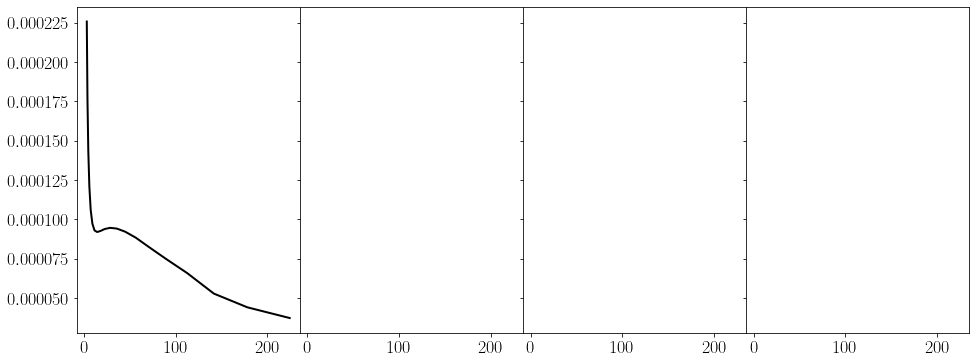

In [73]:
nbins = 4
# bins = (np.arange(6) + 1).astype(int)
fig, ax = pl.subplots(1,nbins, figsize = (nbins*4,6),sharey=True,sharex=True, gridspec_kw = {'wspace':0.0, 'hspace':0.0})
jc = 0
# bins = 4
binl = 5
# labels = [r'$0.2 < z < 0.4$',r'$0.4 < z < 0.55$',r'$0.55 < z < 0.7$', r'$0.7 < z < 0.85$', r'$0.85 < z < 0.95$', r'$0.95 < z < 1.05$']
# clf = pk.load(open('/Users/shivam/Downloads/cls_20200116_DES_maglim_v2.2_v6.22.2_ACT_y_20191209_v2-wmap_nside4096.pickle','rb'))

th_array = DV.xi_result_dict['gtg']['theta']
for j1 in range(nbins):    
#     sel_ind = np.where((bin1 == j1+1) & (bin2 == bins))[0]
#     bin_str = 'bin_' + str(j1+1) + '_' + str(bins)
    
    sel_ind = np.where((bin1_gt == binl) & (bin2_gt == j1+1))[0]
    bin_str = 'bin_' + str(binl) + '_' + str(j1+1)
    
    
#     Cl_j1_1h = DV.xi_result_dict['gtg'][bin_str]['1h']
#     Cl_j1_2h = DV.xi_result_dict['gtg'][bin_str]['2h']
    Cl_j1_tot = DV.xi_result_dict['gtg'][bin_str]    


#     ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_1h/(2*np.pi), linestyle='-', marker='',lw = 2, color ='blue',label='1h')
#     ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_2h/(2*np.pi), linestyle='-', marker='',lw = 2, color ='red',label='2h')
    ax[j1].errorbar(th_array, (th_array**0.7)*Cl_j1_tot, linestyle='-', marker='',lw = 2, color ='black',label='Total')  
    
    ax[j1].errorbar(gt_ang_inpdv[sel_ind], (gt_ang_inpdv[sel_ind] ** 0.7)*gt_inpdv[sel_ind], linestyle='', marker='o',lw = 2, color ='black',label='')   


#     ax[j1].set_yscale('log')
    ax[j1].set_xscale('log')
    ax[j1].set_xlabel(r'$\theta$', size = 20)
    

    ax[j1].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j1].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize = 18, frameon = False)
ax[0].set_ylim(-1e-3,5e-3)
# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\gamma_t$', size = 22)
# ax[1,0].set_ylabel(r'$\ell (\ell+1) C^{gg}_\ell/ 2\pi $', size = 22)
# ax[0,0].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)

pl.tight_layout()

# fig.savefig('xi_gg_compare_maglim_allbins.pdf')





NameError: name 'wt_ang_inpdv' is not defined

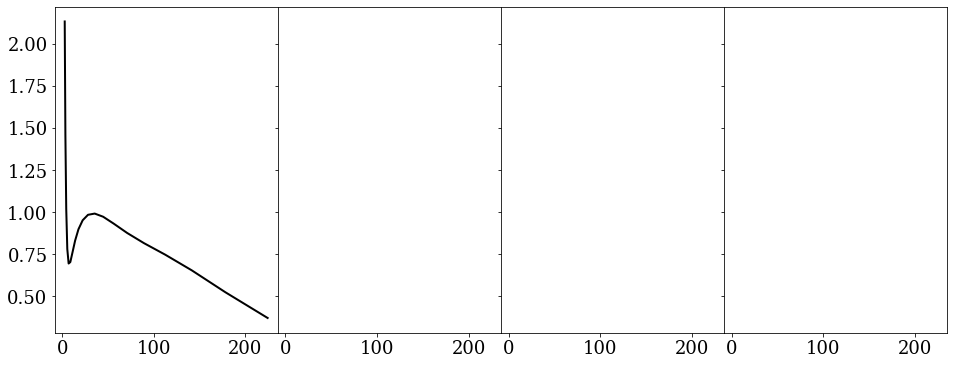

In [7]:
nbins = 4
# bins = (np.arange(6) + 1).astype(int)
fig, ax = pl.subplots(1,nbins, figsize = (nbins*4,6),sharey=True,sharex=True, gridspec_kw = {'wspace':0.0, 'hspace':0.0})
jc = 0
# bins = 4
binl = 5
# labels = [r'$0.2 < z < 0.4$',r'$0.4 < z < 0.55$',r'$0.55 < z < 0.7$', r'$0.7 < z < 0.85$', r'$0.85 < z < 0.95$', r'$0.95 < z < 1.05$']
# clf = pk.load(open('/Users/shivam/Downloads/cls_20200116_DES_maglim_v2.2_v6.22.2_ACT_y_20191209_v2-wmap_nside4096.pickle','rb'))

th_array = DV.xi_result_dict['gg']['theta']
for j1 in range(nbins):    
#     sel_ind = np.where((bin1 == j1+1) & (bin2 == bins))[0]
#     bin_str = 'bin_' + str(j1+1) + '_' + str(bins)
    
    sel_ind = np.where((bin1_wt == j1+1) & (bin2_wt == j1+1))[0]
    bin_str = 'bin_' + str(j1+1) + '_' + str(j1+1)
    
    
#     Cl_j1_1h = DV.xi_result_dict['gtg'][bin_str]['1h']
#     Cl_j1_2h = DV.xi_result_dict['gtg'][bin_str]['2h']
    Cl_j1_tot = DV.xi_result_dict['gg'][bin_str]    


#     ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_1h/(2*np.pi), linestyle='-', marker='',lw = 2, color ='blue',label='1h')
#     ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_2h/(2*np.pi), linestyle='-', marker='',lw = 2, color ='red',label='2h')
    ax[j1].errorbar(th_array, (th_array)*Cl_j1_tot, linestyle='-', marker='',lw = 2, color ='black',label='Total')  
    
    ax[j1].errorbar(wt_ang_inpdv[sel_ind], (wt_ang_inpdv[sel_ind])*wt_inpdv[sel_ind], linestyle='', marker='o',lw = 2, color ='black',label='')   


#     ax[j1].set_yscale('log')
    ax[j1].set_xscale('log')
    ax[j1].set_xlabel(r'$\theta$', size = 20)
    

    ax[j1].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j1].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize = 18, frameon = False)
# ax[0].set_ylim(-1e-3,5e-3)
# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\gamma_t$', size = 22)
# ax[1,0].set_ylabel(r'$\ell (\ell+1) C^{gg}_\ell/ 2\pi $', size = 22)
# ax[0,0].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)

pl.tight_layout()

# fig.savefig('xi_gg_compare_maglim_allbins.pdf')






In [4]:
fname ='/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/compare_pkmm_cs_yx_wdndm.pk'
dpk = dill.load(open(fname,'rb'))

# outdict = {'k':k_array, 'z':self.PS.z_array,'Pk1h':Pkmm1h,'Pk2h':Pkmm2h,'Pktot':Pkmmtot, 'Pk1h_block':Pkmm1h_block,
#            'Pk1h_cs':other_params['pkmm1h_cs'],'Pk2h_cs':other_params['pkmm2h_cs'],'Pktot_cs':other_params['pkmmtot_cs']}    

zall, kall = dpk['z'], dpk['k']

print(dpk['Pk1h_cs'].shape)
print(dpk['Pk1h'].shape)




(51, 299)
(51, 299)


In [14]:
import scipy as sp
dndm_mat, M_array = dpk['dndm'], dpk['M']
rho_bar = 2.755e11 * 0.315
nu_mat, gnu_mat = dpk['nu'], dpk['gnu']
ji = 0
# dndm_mat.shape, nu_mat.shape
i1 = sp.integrate.simps(M_array * dndm_mat[ji,:]/rho_bar, M_array)
i2 = sp.integrate.simps(gnu_mat[ji,:],nu_mat[ji,:])

print((i1-i2)/i1)
j1 = 0
print(dpk['Pk1h'][j1,:][0::10])

print(dpk['Pk1h_cs'][j1,:][0::10])


-0.013922720196163502
[4.57179797e+02 4.57179892e+02 4.57179981e+02 4.57179972e+02
 4.57179864e+02 4.57179921e+02 4.57179939e+02 4.57179801e+02
 4.57178789e+02 4.57174819e+02 4.57158865e+02 4.57094875e+02
 4.56838416e+02 4.55812553e+02 4.51738751e+02 4.36005755e+02
 3.81345929e+02 2.47088015e+02 9.54341343e+01 2.63549397e+01
 5.89973726e+00 7.88801823e-01 8.89552674e-02 8.93580111e-03
 8.37317625e-04 7.58132376e-05 6.80358158e-06 6.14836031e-07
 5.63834622e-08 5.25018464e-09]
[4.58328827e+02 4.58328888e+02 4.58329010e+02 4.58329010e+02
 4.58328888e+02 4.58328857e+02 4.58328979e+02 4.58328888e+02
 4.58327759e+02 4.58323883e+02 4.58307770e+02 4.58243622e+02
 4.57986664e+02 4.56958344e+02 4.52874176e+02 4.37101349e+02
 3.82300018e+02 2.47667526e+02 9.55954514e+01 2.63908634e+01
 5.90745068e+00 7.89642811e-01 8.90351385e-02 8.94223340e-03
 8.37856205e-04 7.58554233e-05 6.80681387e-06 6.15108888e-07
 5.64075151e-08 5.25349853e-09]


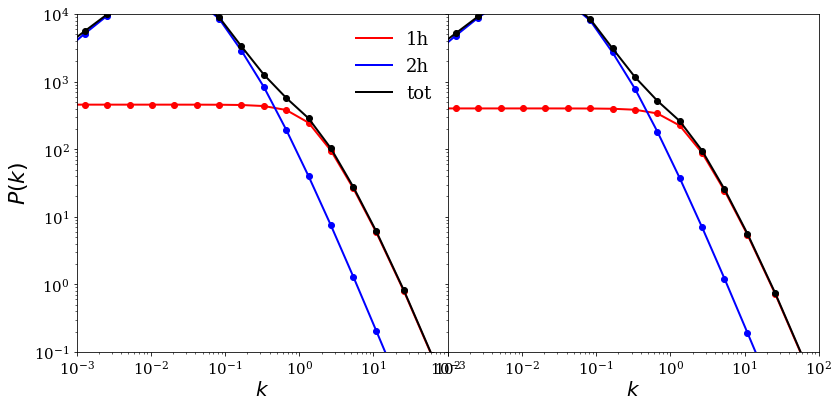

In [15]:
fname ='/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/compare_pkmm_cs_yx_wdndm.pk'
dpk = dill.load(open(fname,'rb'))

# outdict = {'k':k_array, 'z':self.PS.z_array,'Pk1h':Pkmm1h,'Pk2h':Pkmm2h,'Pktot':Pkmmtot, 'Pk1h_block':Pkmm1h_block,
#            'Pk1h_cs':other_params['pkmm1h_cs'],'Pk2h_cs':other_params['pkmm2h_cs'],'Pktot_cs':other_params['pkmmtot_cs']}    

zjpl = [0,1]
nbins = len(zjpl)
fig, ax = pl.subplots(1,nbins, figsize = (nbins*6,6),sharey=True,sharex=True, gridspec_kw = {'wspace':0.0, 'hspace':0.0})
jc = 0

zall, kall = dpk['z'], dpk['k']

for j1 in range(nbins):    
    
    ax[j1].errorbar(kall[0::10], dpk['Pk1h'][j1,:][0::10], linestyle='-', marker='',lw = 2, color ='red',label='1h')      
    ax[j1].errorbar(kall[0::10], dpk['Pk1h_cs'][j1,:][0::10], linestyle='', marker='o',lw = 2, color ='red')   

    ax[j1].errorbar(kall[0::10], dpk['Pk2h'][j1,:][0::10], linestyle='-', marker='',lw = 2, color ='blue',label='2h')      
    ax[j1].errorbar(kall[0::10], dpk['Pk2h_cs'][j1,:][0::10], linestyle='', marker='o',lw = 2, color ='blue')   

    ax[j1].errorbar(kall[0::10], dpk['Pktot'][j1,:][0::10], linestyle='-', marker='',lw = 2, color ='black',label='tot')      
    ax[j1].errorbar(kall[0::10], dpk['Pktot_cs'][j1,:][0::10], linestyle='', marker='o',lw = 2, color ='black')   
    
    ax[j1].set_xscale('log')
    ax[j1].set_yscale('log')
    ax[j1].set_xlabel(r'$k$', size = 20)
    ax[j1].set_xlim(1e-3,1e2)
    

    ax[j1].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j1].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize = 18, frameon = False)
ax[0].set_ylim(1e-1,1e4)
# ax[0].set_xlabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$P(k)$', size = 22)
pl.tight_layout()

# fig.savefig('xi_gg_compare_maglim_allbins.pdf')




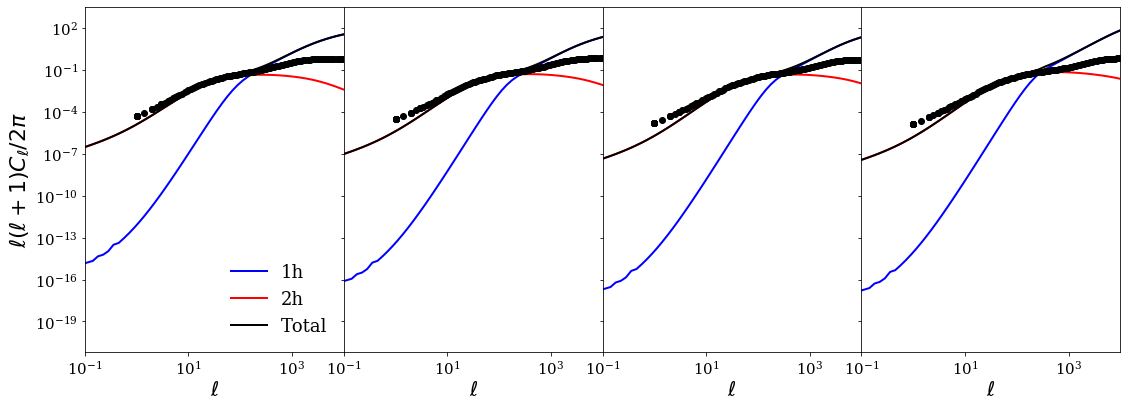

In [9]:
from astropy.io import fits
csf = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/save_wtheta_gammat_fourier_halofit_v0.4.fits')   


bin1_wt = csf['wtheta'].data['BIN1']
bin2_wt = csf['wtheta'].data['BIN2']
wt_csf = csf['wtheta'].data['VALUE']
wt_ang = csf['wtheta'].data['ANG']




nbins = 4
# bins = (np.arange(6) + 1).astype(int)
fig, ax = pl.subplots(1,nbins, figsize = (nbins*4,6),sharey=True,sharex=True, gridspec_kw = {'wspace':0.0, 'hspace':0.0})
jc = 0
# bins = 4
binl = 1
# labels = [r'$0.2 < z < 0.4$',r'$0.4 < z < 0.55$',r'$0.55 < z < 0.7$', r'$0.7 < z < 0.85$', r'$0.85 < z < 0.95$', r'$0.95 < z < 1.05$']
# clf = pk.load(open('/Users/shivam/Downloads/cls_20200116_DES_maglim_v2.2_v6.22.2_ACT_y_20191209_v2-wmap_nside4096.pickle','rb'))

l_array = DV.Cl_result_dict['l_array']
for j1 in range(nbins):    
#     sel_ind = np.where((bin1 == j1+1) & (bin2 == bins))[0]
#     bin_str = 'bin_' + str(j1+1) + '_' + str(bins)
    
    sel_ind = np.where((bin1_wt == j1+1) & (bin2_wt == j1+1))[0]
    bin_str = 'bin_' + str(j1+1) + '_' + str(j1+1)
    
    
    Cl_j1_1h = DV.Cl_result_dict['gg'][bin_str]['1h']
    Cl_j1_2h = DV.Cl_result_dict['gg'][bin_str]['2h']
    Cl_j1_tot = DV.Cl_result_dict['gg'][bin_str]['tot']    


    ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_1h/(2*np.pi), linestyle='-', marker='',lw = 2, color ='blue',label='1h')
    ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_2h/(2*np.pi), linestyle='-', marker='',lw = 2, color ='red',label='2h')
    ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_tot/(2*np.pi), linestyle='-', marker='',lw = 2, color ='black',label='Total')  
    
    ax[j1].errorbar(wt_ang[sel_ind], (wt_ang[sel_ind])*(wt_ang[sel_ind]+1)*wt_csf[sel_ind]/(2*np.pi), linestyle='', marker='o',lw = 2, color ='black',label='')  


    ax[j1].set_yscale('log')
    ax[j1].set_xscale('log')
    ax[j1].set_xlabel(r'$\ell$', size = 20)
    

    ax[j1].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j1].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize = 18, frameon = False)
ax[0].set_xlim(0.1,1e4)
# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\ell (\ell+1) C_\ell / 2\pi $', size = 22)
# ax[1,0].set_ylabel(r'$\ell (\ell+1) C^{gg}_\ell/ 2\pi $', size = 22)
# ax[0,0].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)

pl.tight_layout()

# fig.savefig('xi_gg_compare_maglim_allbins.pdf')






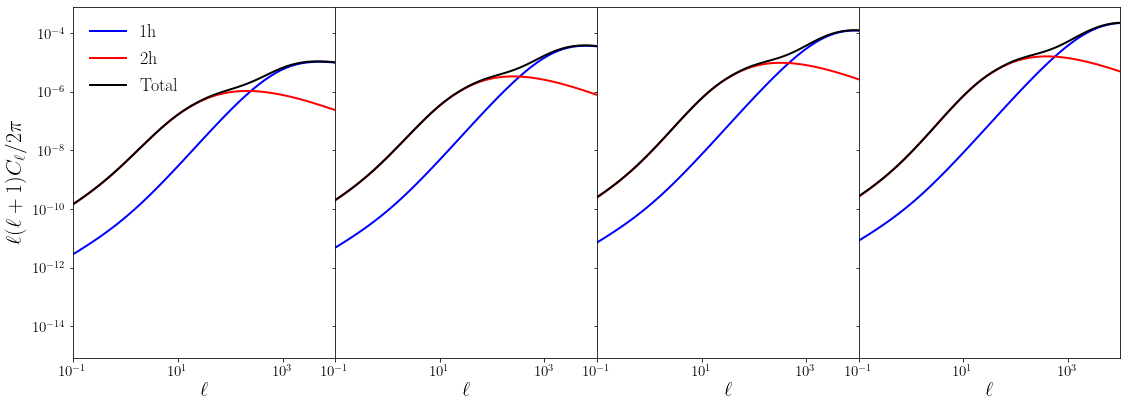

In [75]:
nbins = 4
# bins = (np.arange(6) + 1).astype(int)
fig, ax = pl.subplots(1,nbins, figsize = (nbins*4,6),sharey=True,sharex=True, gridspec_kw = {'wspace':0.0, 'hspace':0.0})
jc = 0
# bins = 4
binl = 5
# labels = [r'$0.2 < z < 0.4$',r'$0.4 < z < 0.55$',r'$0.55 < z < 0.7$', r'$0.7 < z < 0.85$', r'$0.85 < z < 0.95$', r'$0.95 < z < 1.05$']
# clf = pk.load(open('/Users/shivam/Downloads/cls_20200116_DES_maglim_v2.2_v6.22.2_ACT_y_20191209_v2-wmap_nside4096.pickle','rb'))

l_array = DV.Cl_result_dict['l_array']
for j1 in range(nbins):    
#     sel_ind = np.where((bin1 == j1+1) & (bin2 == bins))[0]
#     bin_str = 'bin_' + str(j1+1) + '_' + str(bins)
    
    sel_ind = np.where((bin1 == j1+1) & (bin2 == j1+1))[0]
    bin_str = 'bin_' + str(j1+1) + '_' + str(j1+1)
    
    
    Cl_j1_1h = DV.Cl_result_dict['kk'][bin_str]['1h']
    Cl_j1_2h = DV.Cl_result_dict['kk'][bin_str]['2h']
    Cl_j1_tot = DV.Cl_result_dict['kk'][bin_str]['tot']    


    ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_1h/(2*np.pi), linestyle='-', marker='',lw = 2, color ='blue',label='1h')
    ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_2h/(2*np.pi), linestyle='-', marker='',lw = 2, color ='red',label='2h')
    ax[j1].errorbar(l_array, (l_array)*(l_array+1)*Cl_j1_tot/(2*np.pi), linestyle='-', marker='',lw = 2, color ='black',label='Total')  
    
#     ax[j1].errorbar(gt_ang[sel_ind], (gt_ang[sel_ind])*(gt_ang[sel_ind]+1)*gt_csf[sel_ind]/(2*np.pi), linestyle='', marker='o',lw = 2, color ='black',label='')  


    ax[j1].set_yscale('log')
    ax[j1].set_xscale('log')
    ax[j1].set_xlabel(r'$\ell$', size = 20)
    

    ax[j1].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j1].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize = 18, frameon = False)
ax[0].set_xlim(0.1,1e4)
# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\ell (\ell+1) C_\ell / 2\pi $', size = 22)
# ax[1,0].set_ylabel(r'$\ell (\ell+1) C^{gg}_\ell/ 2\pi $', size = 22)
# ax[0,0].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)

pl.tight_layout()

# fig.savefig('xi_gg_compare_maglim_allbins.pdf')







In [52]:
csf['nz_source'].data['Z_MID']



array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

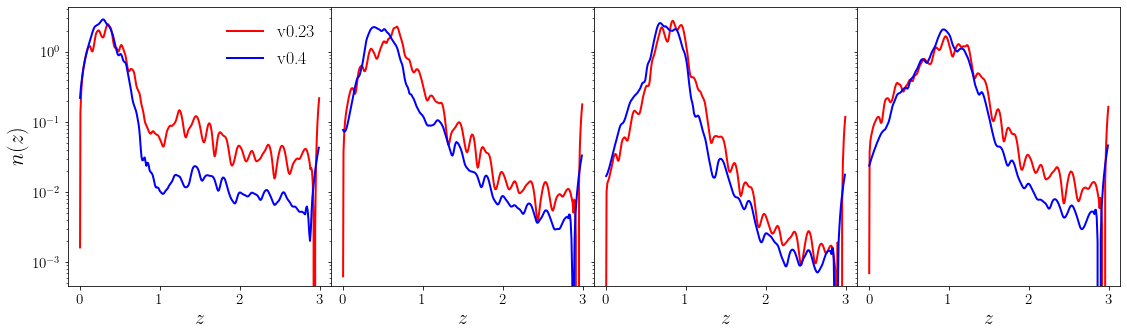

In [38]:
fnames = ['/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/successful_sim_fiducial.fits',
         '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/v0.40_fiducial.fits']

import scipy.signal as spsg
nbins = 4
# bins = (np.arange(6) + 1).astype(int)
fig, ax = pl.subplots(1,nbins, figsize = (nbins*4,5),sharey=True,sharex=True, gridspec_kw = {'wspace':0.0, 'hspace':0.0})
jc = 0
# bins = 4
binl = 5
# labels = [r'$0.2 < z < 0.4$',r'$0.4 < z < 0.55$',r'$0.55 < z < 0.7$', r'$0.7 < z < 0.85$', r'$0.85 < z < 0.95$', r'$0.95 < z < 1.05$']
# clf = pk.load(open('/Users/shivam/Downloads/cls_20200116_DES_maglim_v2.2_v6.22.2_ACT_y_20191209_v2-wmap_nside4096.pickle','rb'))
colors = ['red','blue']
labels = ['v0.23','v0.4']

l_array = DV.Cl_result_dict['l_array']
for j1 in range(nbins):    
#     sel_ind = np.where((bin1 == j1+1) & (bin2 == bins))[0]
#     bin_str = 'bin_' + str(j1+1) + '_' + str(bins)
    for jf in range(2):
        csf = fits.open(fnames[jf])
        zmid = csf['nz_source'].data['Z_MID']
        nz_orig = csf['nz_source'].data['BIN' + str(j1+1)]
        nz_smooth =  spsg.savgol_filter(nz_orig, 11, 5)
        ax[j1].errorbar(zmid, nz_smooth, linestyle='-', marker='',lw = 2, color =colors[jf],label=labels[jf])  


    ax[j1].set_yscale('log')
#     ax[j1].set_xscale('log')
    ax[j1].set_xlabel(r'$z$', size = 20)


    ax[j1].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j1].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize = 18, frameon = False)
ax[0].set_ylabel(r'$n(z)$', size = 22)
pl.tight_layout()

# fig.savefig('xi_gg_compare_maglim_allbins.pdf')




In [37]:
csf = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/save_code_comparison_real_halofit_v0.4.fits')   
# csf = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/save_code_comparison_fourier_halofit_v0.4_wmead.fits')   
bin1_gt = csf['gammat'].data['BIN1']
bin2_gt = csf['gammat'].data['BIN2']
gt_csf = csf['gammat'].data['VALUE']
gt_ang = csf['gammat'].data['ANG']


bin1_wt = csf['wtheta'].data['BIN1']
bin2_wt = csf['wtheta'].data['BIN2']
wt_csf = csf['wtheta'].data['VALUE']
wt_ang = csf['wtheta'].data['ANG']


bin1_xip = csf['xip'].data['BIN1']
bin2_xip = csf['xip'].data['BIN2']
xip_csf = csf['xip'].data['VALUE']
xip_ang = csf['xip'].data['ANG']





In [112]:

os.environ['COSMOSIS_SRC_DIR'] = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/'
sys.path.insert(0, '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/cosmosis_code/')
DV = dill.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/DV_obj_temp_all_code_comparison_hf_Pnl_hod2_cbh.pk','rb'))   








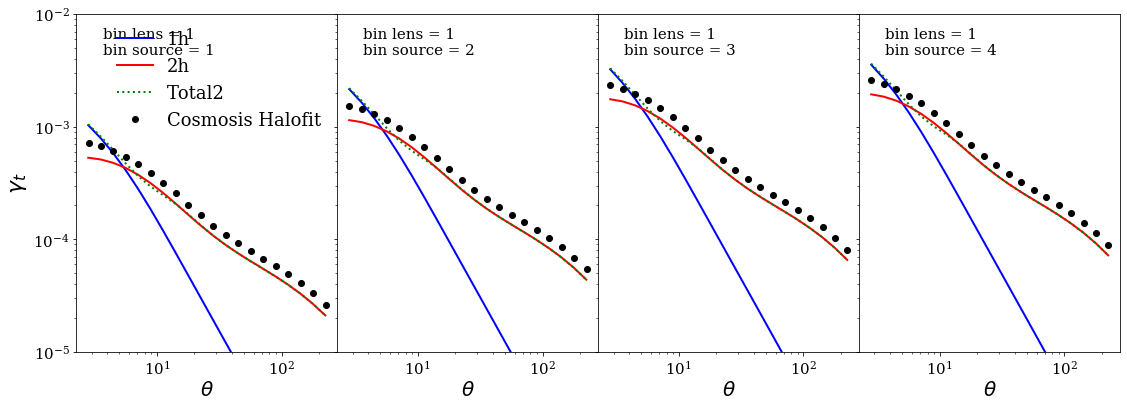

In [113]:
nbins = 4
fig, ax = pl.subplots(1,nbins, figsize = (nbins*4,6),sharey=True,sharex=True, gridspec_kw = {'wspace':0.0, 'hspace':0.0})
jc = 0
# bins = 4
binl = 1

theta_array = DV.xi_result_dict['gtg']['theta']
for j1 in range(nbins):        
    sel_ind = np.where((bin1_gt == binl) & (bin2_gt == j1+1))[0]
    bin_str = 'bin_' + str(binl) + '_' + str(j1+1)
    
    Cl_j1_1h = DV.xi_result_dict['gtg'][bin_str]['1h']
    Cl_j1_2h = DV.xi_result_dict['gtg'][bin_str]['2h']
    Cl_j1_tot = DV.xi_result_dict['gtg'][bin_str]['tot']
    Cl_j1_tot2 = DV.xi_result_dict['gtg'][bin_str]['tot2']

    ax[j1].errorbar(theta_array, Cl_j1_1h, linestyle='-', marker='',lw = 2, color ='blue',label='1h')
    ax[j1].errorbar(theta_array, Cl_j1_2h, linestyle='-', marker='',lw = 2, color ='red',label='2h')
#     ax[j1].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color ='black',label='Total')  
    ax[j1].errorbar(theta_array, Cl_j1_tot2, linestyle=':', marker='',lw = 2, color ='green',label='Total2')  
    
    ax[j1].errorbar(gt_ang[sel_ind], gt_csf[sel_ind], linestyle='', marker='o',lw = 2, color ='black',label='Cosmosis Halofit')  
    text = 'bin lens = ' + str(binl) + '\n' + 'bin source = ' + str(j1+1)
    ax[j1].text( 0.1, 0.96,text, verticalalignment='top', horizontalalignment='left', transform=ax[j1].transAxes, fontsize=15)    

    ax[j1].set_yscale('log')
    ax[j1].set_xscale('log')
    ax[j1].set_xlabel(r'$\theta$', size = 20)
    
    ax[j1].tick_params(axis='both', which='minor', labelsize=15)    
    ax[j1].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize = 18, frameon = False)
ax[0].set_ylim(1e-5,1e-2)
ax[0].set_ylabel(r'$\gamma_t$', size = 22)
pl.tight_layout()

# fig.savefig('xi_gg_compare_maglim_allbins.pdf')




In [90]:
srtf = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/ratios_cosmosis.npy'  
srt = np.load(srtf,allow_pickle=True,encoding='latin1')


In [79]:
srt

array({'(1,1,4)': array([0.27928439, 0.28178416, 0.28456433, 0.28755503, 0.29056204,
       0.29325327, 0.29521721, 0.29608748, 0.29570062, 0.29420146,
       0.29200583, 0.28966377, 0.28768774, 0.28641946, 0.28599832,
       0.28641771, 0.28759939, 0.28947076, 0.29197633, 0.29508006]), '(1,2,4)': array([0.59617019, 0.59861805, 0.60131623, 0.6041883 , 0.60703134,
       0.60952325, 0.61128108, 0.61198138, 0.61150133, 0.61000061,
       0.60788097, 0.60566226, 0.60382324, 0.60267695, 0.60234546,
       0.60281474, 0.60400408, 0.60584008, 0.60826772, 0.61124098]), '(3,1,4)': array([0.06254589, 0.06259883, 0.06263567, 0.06265071, 0.06264166,
       0.06261072, 0.06256364, 0.06250959, 0.06245936, 0.06242156,
       0.06240042, 0.06239643, 0.06240883, 0.0624367 , 0.0624768 ,
       0.06252236, 0.0625878 , 0.06264759, 0.06277455, 0.06276893]), '(3,2,4)': array([0.20445399, 0.20477918, 0.2049933 , 0.2050639 , 0.20498185,
       0.20476392, 0.20444881, 0.20409686, 0.20377697, 0.20354271,
     

In [97]:
srt114 = np.array([0.27928439, 0.28178416, 0.28456433, 0.28755503, 0.29056204,
       0.29325327, 0.29521721, 0.29608748, 0.29570062, 0.29420146,
       0.29200583, 0.28966377, 0.28768774, 0.28641946, 0.28599832,
       0.28641771, 0.28759939, 0.28947076, 0.29197633, 0.29508006])

srt124 = np.array([0.59617019, 0.59861805, 0.60131623, 0.6041883 , 0.60703134,
       0.60952325, 0.61128108, 0.61198138, 0.61150133, 0.61000061,
       0.60788097, 0.60566226, 0.60382324, 0.60267695, 0.60234546,
       0.60281474, 0.60400408, 0.60584008, 0.60826772, 0.61124098])

theta_srt = np.array([[  2.83602296,   3.57034138,   4.49479349,   5.65860974,
         7.1237676 ,   8.96829206,  11.29041078,  14.21378504,
        17.89409518,  22.52733114,  28.36022963,  35.70341377,
        44.94793488,  56.58609743,  71.23767601,  89.68292061,
       112.90410776, 142.13785035, 178.94095179, 225.27331141]])



In [114]:
bin_str11 = 'bin_' + str(1) + '_' + str(1)
bin_str12 = 'bin_' + str(1) + '_' + str(2)
bin_str14 = 'bin_' + str(1) + '_' + str(4)
xi11 = DV.xi_result_dict['gtg'][bin_str11]['tot2']
xi12 = DV.xi_result_dict['gtg'][bin_str12]['tot2']
xi14 = DV.xi_result_dict['gtg'][bin_str14]['tot2']

srt114_yx = xi11/xi14
srt124_yx = xi12/xi14



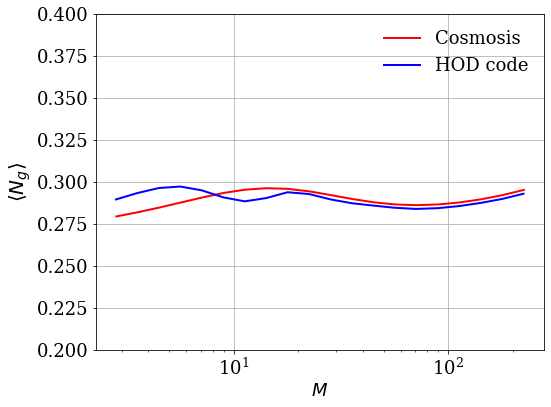

In [116]:
fig, ax = pl.subplots(1,1, figsize = (8,6),sharex=True,sharey='row')
colors = ['red','blue','orange','black','green','magenta']

ax.errorbar(theta_srt, srt114,ls='-',marker='',linewidth=2.0,color=colors[0],label='Cosmosis')   
ax.errorbar(theta_array, srt114_yx,ls='-',marker='',linewidth=2.0,color=colors[1],label='HOD code')   

# ax.errorbar(theta_srt, srt124,ls='-',marker='',linewidth=2.0,color=colors[0])   
# ax.errorbar(theta_array, srt124_yx,ls='-',marker='',linewidth=2.0,color=colors[1])   



ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$M$', size = 18)
ax.grid(True)
ax.set_ylim(0.20,0.4)
# ax.set_ylim(0.48,0.74)
# ax.set_xlim(1e11,2e15)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.legend(fontsize = 18, frameon = False)
ax.set_ylabel(r'$\langle N_g \rangle$', size = 20)
pl.tight_layout()










